# Titanic Data Visualization

This project focus on make some data visualization about the Titanic disaster. The dataset it's provided on [Kaggle](https://www.kaggle.com/c/titanic/data) which you can download it and join a competition. This is a great way to introduce yourself on the world of data analysis, Let's begin!

## The Titanic Disaster

**Kaggle Description**

>"The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class."


## Goal

Define a goal or a question, it's very important on data analysis. It'll narrow and focus your analysis to get good results. It's one of the things which research and data analyze differ.

I recommend this free course to understand more about data analyze process: [**Data Science Research Methods: Python Edition**](https://edx1.green.com.br/courses/course-v1:Microsoft+PTBRDAT273x+2019_T1/about)

**Our Goal:** Discover which variables influence on the survival probability.
## Libraries

- **Pandas:** Awesome to work with data structures and data analysis tools.
- **Matplotlib:** A Python 2D plotting lib which is the foundation of the next great lib.
- **Seaborn:** It provides a high-level interface for drawing attractive and informative statistical graphics.


In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

On *kaggle* you can get the dataset train.csv, it used on this notebook.

*Also you can see a data dictionary and variable notes*

Load the datasets [kaggle](https://www.kaggle.com/c/titanic/data)

In [146]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploring dataset 

In [147]:
# some measures
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [148]:
# columns
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [149]:
# data types
display(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Rename the columns to be crystal clear.

In [150]:
train_data.rename({'Pclass':'Class','SibSp':'Siblings/Spouse','Parch':'Parents/Childrens'}, axis='columns', inplace=True)
train_data.head()

,PassengerId,Survived,Class,Name,Sex,Age,Siblings/Spouse,Parents/Childrens,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The collumns values of "Embarked", represents the name of cities which titanic stoped. 

In [151]:
train_data['Embarked'] = train_data['Embarked'].replace(['S','Q','C'],['Southampton', 'Queenstown', 'Cherbourg'])
train_data.head()

,PassengerId,Survived,Class,Name,Sex,Age,Siblings/Spouse,Parents/Childrens,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


How many men and women was there?

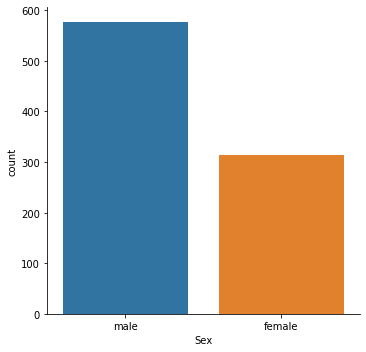

In [152]:
# Sex distribution
sns.catplot('Sex', data=train_data, kind='count')

The Class distribution

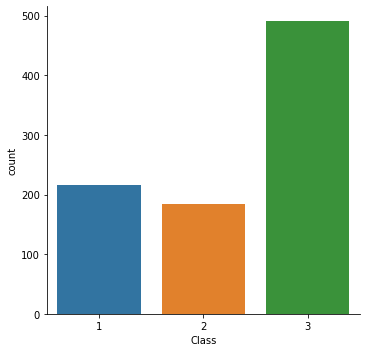

In [153]:
sns.catplot('Class',data=train_data, kind='count')

How many people survived? 


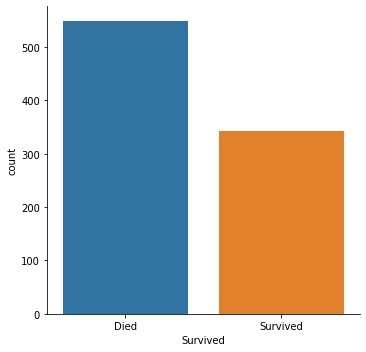

In [154]:
# Change number values 
survived_map = {0: 'Died', 1: 'Survived'}
sns.catplot('Survived',data=train_data, kind='count').set_xticklabels(survived_map.values())

Divide a group and see the distribution

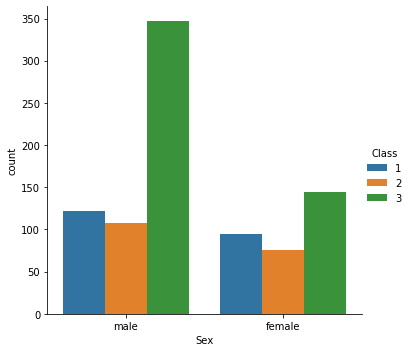

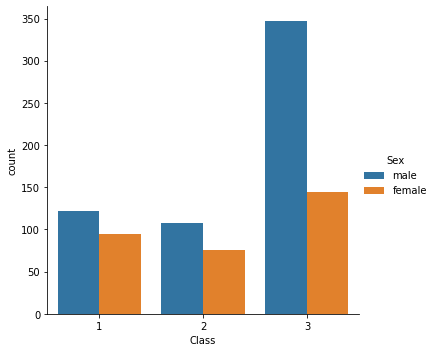

In [155]:
# divide sex per class
sns.catplot('Sex', data=train_data, hue='Class', kind='count')
# divide class  per sex
sns.catplot('Class', data=train_data, hue='Sex', kind='count')

How many adults was there per sex?

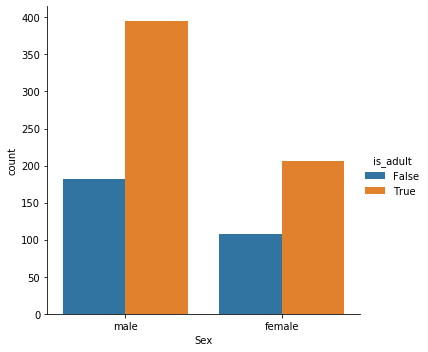

In [156]:
# new column
train_data['is_adult'] = train_data.Age.apply(lambda age: age >= 18)
sns.catplot('Sex', data=train_data, hue='is_adult', kind='count')

How was the age distribution?

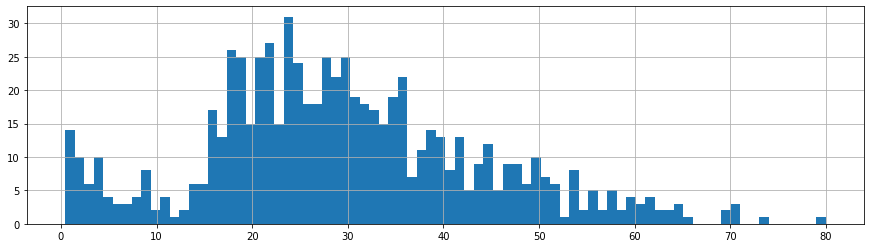

In [157]:
train_data.Age.hist(bins=int(train_data.Age.max()), figsize=(15, 4))

Most of passagers were between 20 and 30

Who had more survival probability per sex?

In [158]:
train_data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


Comparing survival probability per Class, Sex, Embarked

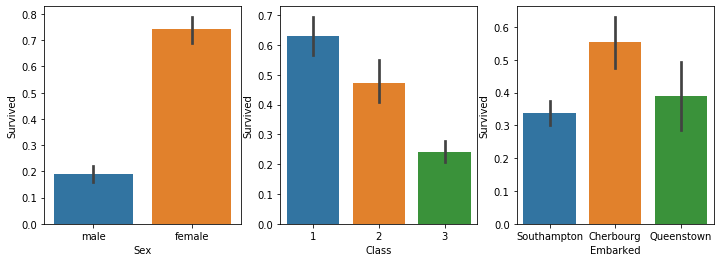

In [159]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train_data, ax=axis1)
sns.barplot(x='Class', y='Survived', data=train_data, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train_data, ax=axis3);

Survival probability per Age

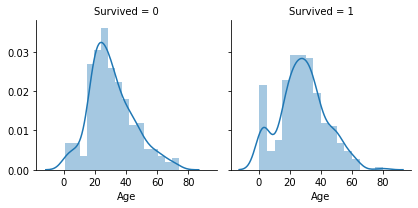

In [160]:
age_survived = sns.FacetGrid(train_data, col='Survived')
age_survived.map(sns.distplot, 'Age')